# GFER Plamitate TMRE (improved len cleaning)
_Maydan Wienreb_
<img src="https://raw.githubusercontent.com/maydanw/InEasyReach/master/hr-brian-litzinger-one.png" alt="Drawing" style="width: 100%; height: 60px" />

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

# Imports

In [2]:
"""
This will enable completion on elements of lists, results of function calls, etc.
However, be warned that enabling this option can be unsafe, because the code is actually evaluated upon hitting TAB
"""
%config IPCompleter.greedy=True

from typing import Dict, Tuple, List

# import numpy
import numpy as np
np.random.seed(0) # Remmeber to reset the seed every time if you expect the second draw to be the same as the first.

#import pandas
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# import graphics
%matplotlib inline
# %matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = [12.0, 8.0]
rcParams['pdf.fonttype'] = 42 ## Output Type 3 (Type3) or Type 42 (TrueType)
rcParams['font.sans-serif'] = 'Arial'
import seaborn as sns
sns.set_style("whitegrid")

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# %load_ext autoreload
# %autoreload 1
# %aimport TestFunctions
## See: https://ipython.org/ipython-doc/3/config/extensions/autoreload.html


In [3]:
rcParams['figure.figsize'] = [12.0, 8.0]
rcParams['pdf.fonttype'] = 42 ## Output Type 3 (Type3) or Type 42 (TrueType)
rcParams['font.sans-serif'] = 'Arial'
sns.set_style("whitegrid")

In [4]:
import types
import sys
print ("Basic packages versions:")
print ("   Python version: %s" % (sys.version))
print ("   Packages:")


try:  
    g=globals().values()
    for i, mod in enumerate(g):
        if isinstance(mod, types.ModuleType):
            if hasattr(mod, '__name__') and hasattr(mod, '__version__'):
                print ("   %s: %s" % (mod.__name__, mod.__version__))
except: 
    g=globals().values()
    for i, mod in enumerate(g):
        if isinstance(mod, types.ModuleType):
            if hasattr(mod, '__name__') and hasattr(mod, '__version__'):
                print ("   %s: %s" % (mod.__name__, mod.__version__))

Basic packages versions:
   Python version: 3.7.1 | packaged by conda-forge | (default, Mar 13 2019, 13:32:59) [MSC v.1900 64 bit (AMD64)]
   Packages:
   json: 2.0.9
   numpy: 1.16.2
   pandas: 0.24.2
   seaborn: 0.9.0


# General

# Loading the data

In [5]:
data_path = "../Data/Palmitate/12h/Standard lab acquisition protocol 5_pal12htmremito160419gfer1_1/agg_results_new.csv"

df = pd.read_csv(data_path, index_col=0)
df = df.drop(labels='index', axis=1)
df = df[df.nuc_outlier==False]
df = df[df.cyto_outlier==False]
df = df[df.Cyto_border_case==False]
df = df.drop(labels=['nuc_outlier', 'cyto_outlier', 'Cyto_border_case'], axis=1)
df.sample(5)

Cyto_intensity_avg  Cyto_intensity_count  Cyto_intensity_max  Cyto_intensity_q10  Cyto_intensity_q50  Cyto_intensity_q90  Cyto_intensity_std  Cyto_intensity_sum  Cyto_morphological_area  Cyto_morphological_aspect_ratio  Cyto_morphological_circularity_size_ratio  Cyto_morphological_cx  Cyto_morphological_cy  Cyto_morphological_extent  Cyto_morphological_h  Cyto_morphological_min_enclosing_circle_area  Cyto_morphological_perimeter  Cyto_morphological_rect_area  Cyto_morphological_solidity  Cyto_morphological_w  MitoTracker_count  MitoTracker_in_TMRE_avg_mean  MitoTracker_in_TMRE_avg_median  MitoTracker_in_TMRE_avg_q10  MitoTracker_in_TMRE_avg_q90  MitoTracker_in_TMRE_avg_std  MitoTracker_in_TMRE_avg_sum  MitoTracker_in_TMRE_max_mean  MitoTracker_in_TMRE_max_median  MitoTracker_in_TMRE_max_q10  MitoTracker_in_TMRE_max_q90  MitoTracker_in_TMRE_max_std  MitoTracker_in_TMRE_max_sum  MitoTracker_in_TMRE_q10_mean  MitoTracker_in_TMRE_q10_median  MitoTracker_in_TMRE_q10_q10  \
13521           19.930949               33352.0                91.0                 5.0                12.0                46.0           17.958969            664737.0                  32672.5                         2.261411                                   0.132290                 1417.0                 1656.0                   0.248753                 241.0                                 252113.502847                   1538.354460                      131345.0                     0.556118                 545.0               17.0                      2.474252                        0.000000                          0.0                     7.620879                     4.407971                    42.062278                      5.294118                             0.0                          0.0                         11.6                    12.916872                         90.0                      1.723529                             0.0                          0.0   
6978            36.878179               16475.0               113.0                 7.0                29.0                78.0           26.322552            607568.0                  15973.5                         0.475124                                   0.123099                 1132.0                  845.0                   0.208037                 402.0                                 133835.903841                   1115.820409                       76782.0                     0.532805                 191.0                9.0                      5.644935                        5.960000                          0.0                     9.572672                     5.535452                    50.804415                     12.777778                            10.0                          0.0                         24.0                    19.936009                        115.0                      3.555556                             5.0                          0.0   
6083            24.500784               14038.0                57.0                16.0                21.0                38.0            9.302163            343942.0                  13623.5                         1.434066                                   0.237125                  375.0                 1729.0                   0.286798                 182.0                                  59200.845788                    953.335128                       47502.0                     0.638297                 261.0               10.0                      2.727220                        0.000000                          0.0                    10.155502                     4.524745                    27.272196                      5.000000                             0.0                          0.0                         16.8                     8.705043                         50.0                      1.800000                             0.0                          0.0   
4111            23.819009               29123.0

In [6]:
df["Patient"] = np.nan
df.loc[df.column.isin([2, 3]), "Patient"] = "AV"
df.loc[df.column.isin([4, 5]), "Patient"] = "AG015"
df.loc[df.column.isin([6, 7]), "Patient"] = "EV"
df.loc[df.column.isin([8, 9]), "Patient"] = "CM"
df.loc[df.column.isin([10, 11]), "Patient"] = "progeria127"
display('ok'if df["Patient"].isna().any()==False else ':-(')

'ok'

In [7]:
patient_plate = df.groupby(['column', 'row']).Patient.first().unstack(level=-1).T
patient_plate

column  2   3      4      5   6   7   8   9            10           11
row                                                                   
B       AV  AV  AG015  AG015  EV  EV  CM  CM  progeria127  progeria127
C       AV  AV  AG015  AG015  EV  EV  CM  CM  progeria127  progeria127
D       AV  AV  AG015  AG015  EV  EV  CM  CM  progeria127  progeria127
E       AV  AV  AG015  AG015  EV  EV  CM  CM  progeria127  progeria127
F       AV  AV  AG015  AG015  EV  EV  CM  CM  progeria127  progeria127
G       AV  AV  AG015  AG015  EV  EV  CM  CM  progeria127  progeria127

In [8]:
df["Compound"] = np.nan
df.loc[df.column.isin([2,4,6,8,10]), "Compound"] = "Normal"
df.loc[df.column.isin([3,5,7,9,11]), "Compound"] = "Palmitate"

display('ok'if df["Patient"].isna().any()==False else ':-(')

'ok'

In [9]:
compound_plate = df.groupby(['column', 'row']).Compound.first().unstack(level=-1).T
compound_plate

column      2          3       4          5       6          7       8          9       10         11
row                                                                                                  
B       Normal  Palmitate  Normal  Palmitate  Normal  Palmitate  Normal  Palmitate  Normal  Palmitate
C       Normal  Palmitate  Normal  Palmitate  Normal  Palmitate  Normal  Palmitate  Normal  Palmitate
D       Normal  Palmitate  Normal  Palmitate  Normal  Palmitate  Normal  Palmitate  Normal  Palmitate
E       Normal  Palmitate  Normal  Palmitate  Normal  Palmitate  Normal  Palmitate  Normal  Palmitate
F       Normal  Palmitate  Normal  Palmitate  Normal  Palmitate  Normal  Palmitate  Normal  Palmitate
G       Normal  Palmitate  Normal  Palmitate  Normal  Palmitate  Normal  Palmitate  Normal  Palmitate

# Number of cells 


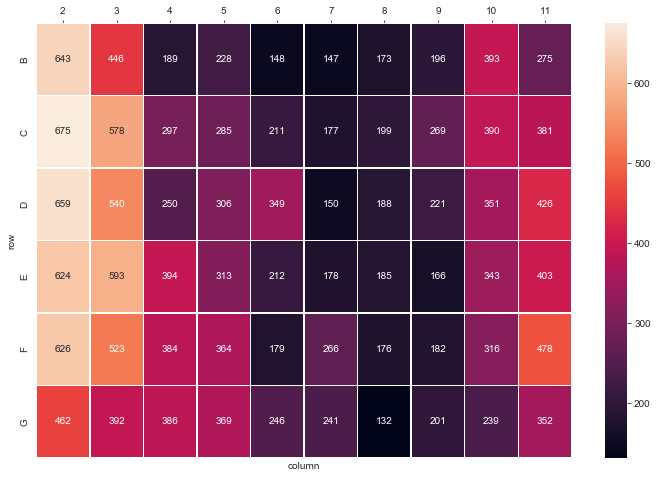

In [10]:
cell_in_well = df.groupby(["row", "column"])["Compound"].count().unstack(level=-1)
ax = sns.heatmap(cell_in_well, linewidths=0.5, annot=True, fmt="0.00f")
ax.xaxis.set_ticks_position('top')

In [11]:
order = ['Normal', 'Palmitate']

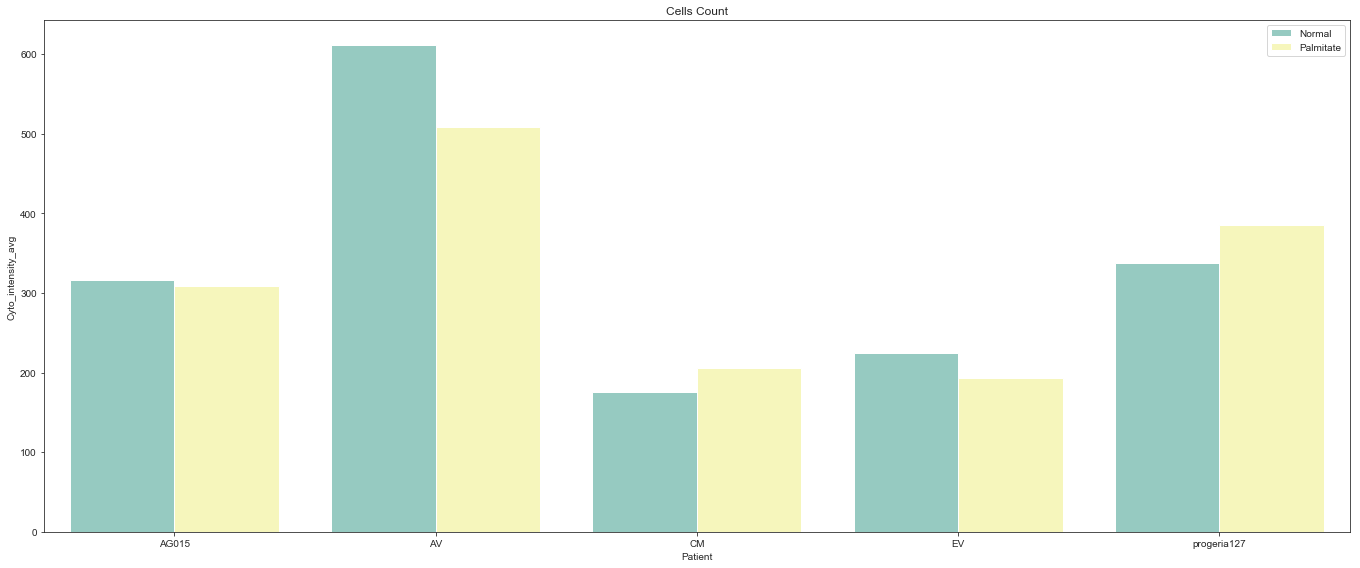

In [12]:
g = df.groupby(["row", "column", "Patient", "Compound"])["Cyto_intensity_avg"].count()
g = g.groupby(["Patient", "Compound"]).mean().reset_index()


sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.barplot(x="Patient", y="Cyto_intensity_avg", hue="Compound", data=g, palette="Set3" ,ax=ax, ci=None, hue_order=order);
ax.set_title("Cells Count")
ax.legend(loc = 1)
plt.tight_layout()


# Analyzing the features

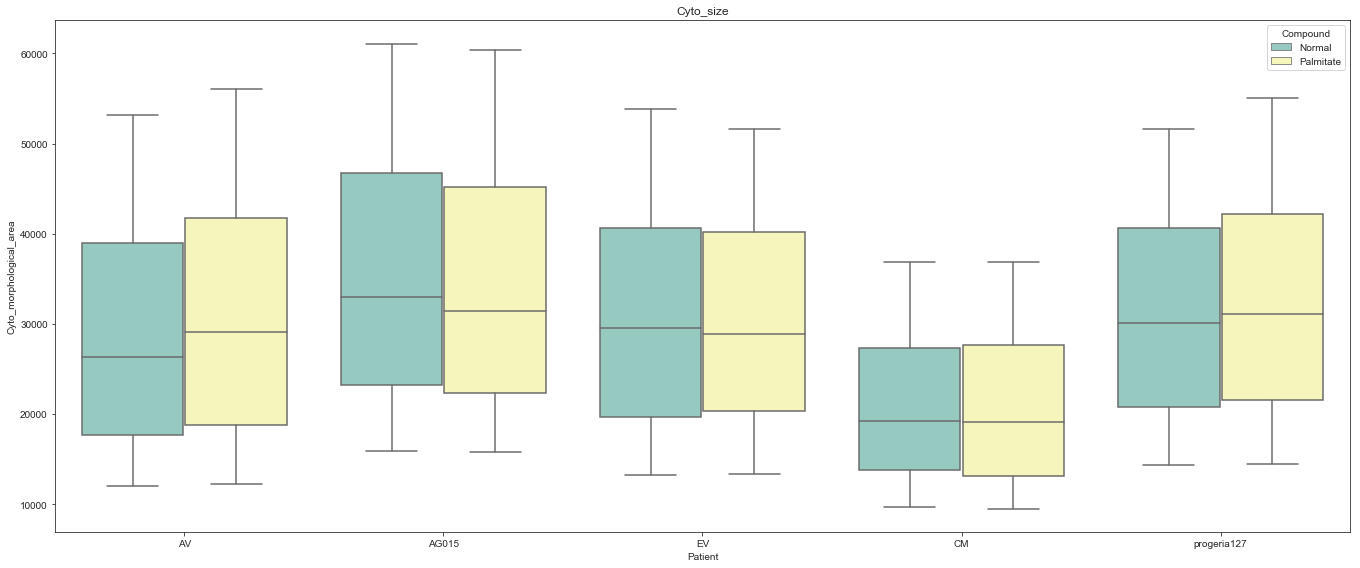

In [13]:
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Patient", y="Cyto_morphological_area", hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
ax.set_title("Cyto_size")
plt.tight_layout()

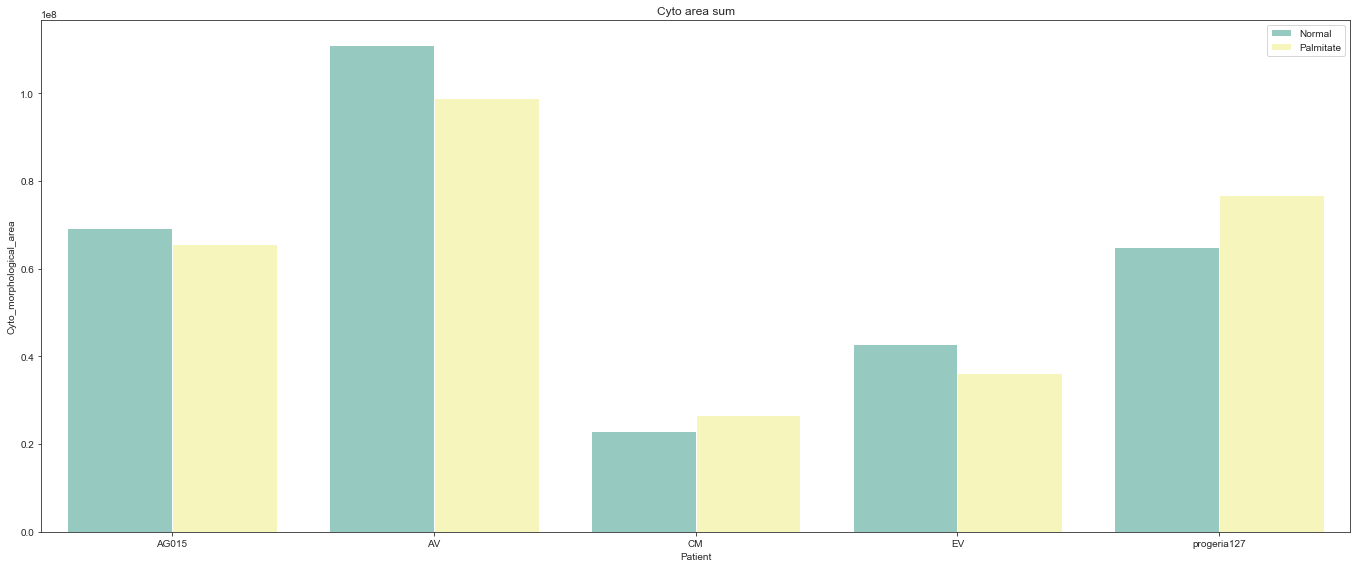

In [14]:
g = df.groupby(['Patient', 'Compound'])["Cyto_morphological_area"].sum().reset_index()

sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.barplot(x="Patient", y="Cyto_morphological_area", hue="Compound", data=g, palette="Set3" ,ax=ax, ci=None, hue_order=order);
ax.set_title("Cyto area sum")
ax.legend(loc = 1)
plt.tight_layout()


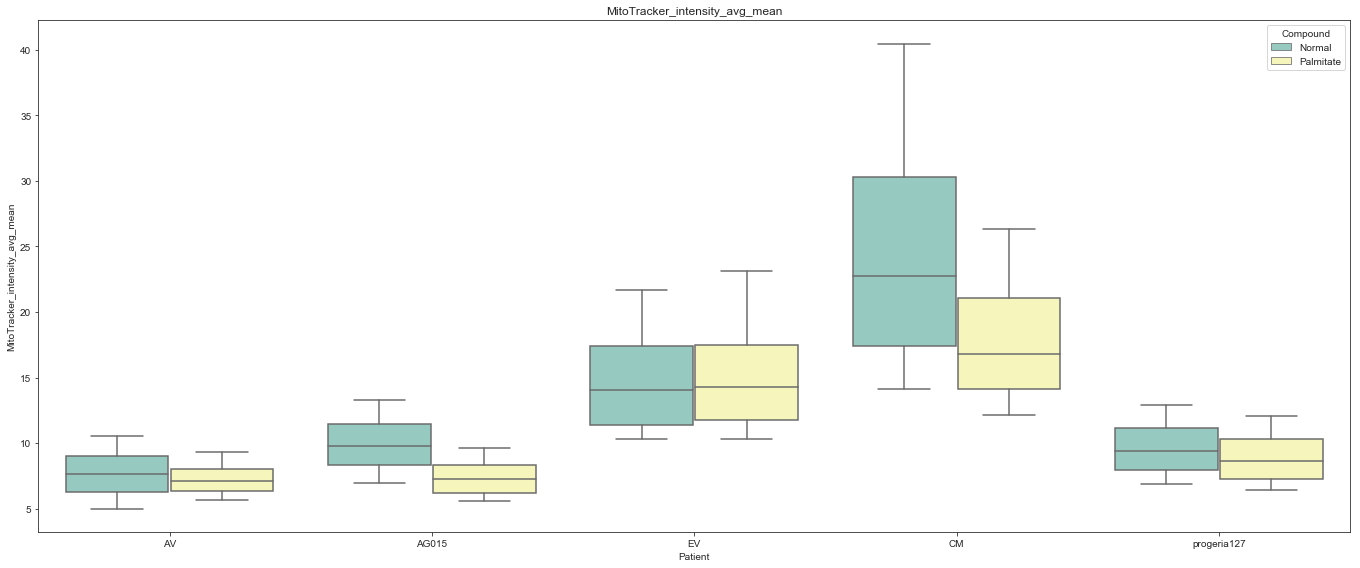

In [15]:
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Patient", y="MitoTracker_intensity_avg_mean", hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
ax.set_title("MitoTracker_intensity_avg_mean")
plt.tight_layout()

it is weird that the affect on AV and EV is so different from the affect on AG015 and CM

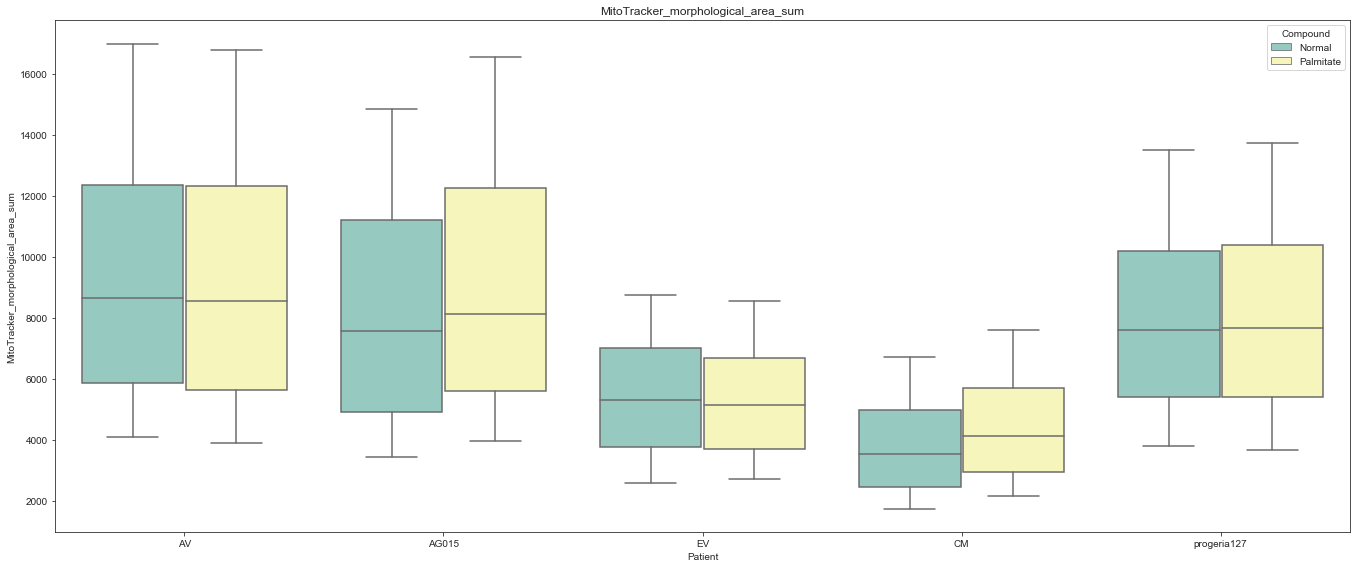

In [19]:
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Patient", y="MitoTracker_morphological_area_sum", hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
ax.set_title("MitoTracker_morphological_area_sum")
plt.tight_layout()

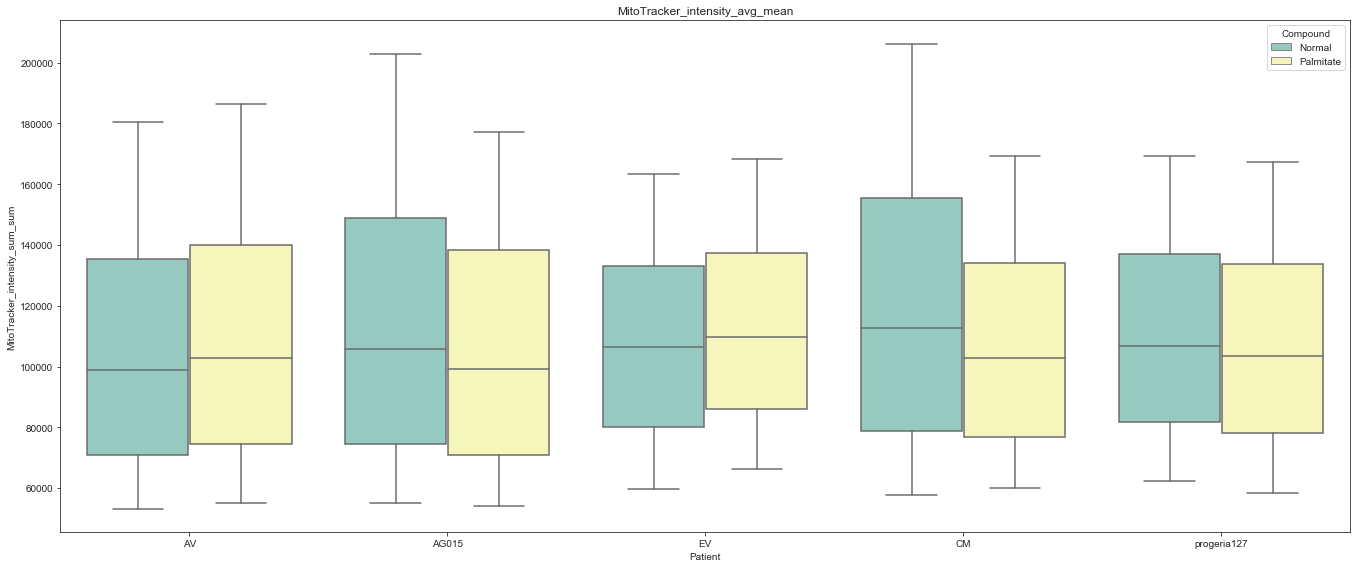

In [20]:
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Patient", y="MitoTracker_intensity_sum_sum", hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
ax.set_title("MitoTracker_intensity_avg_mean")
plt.tight_layout()

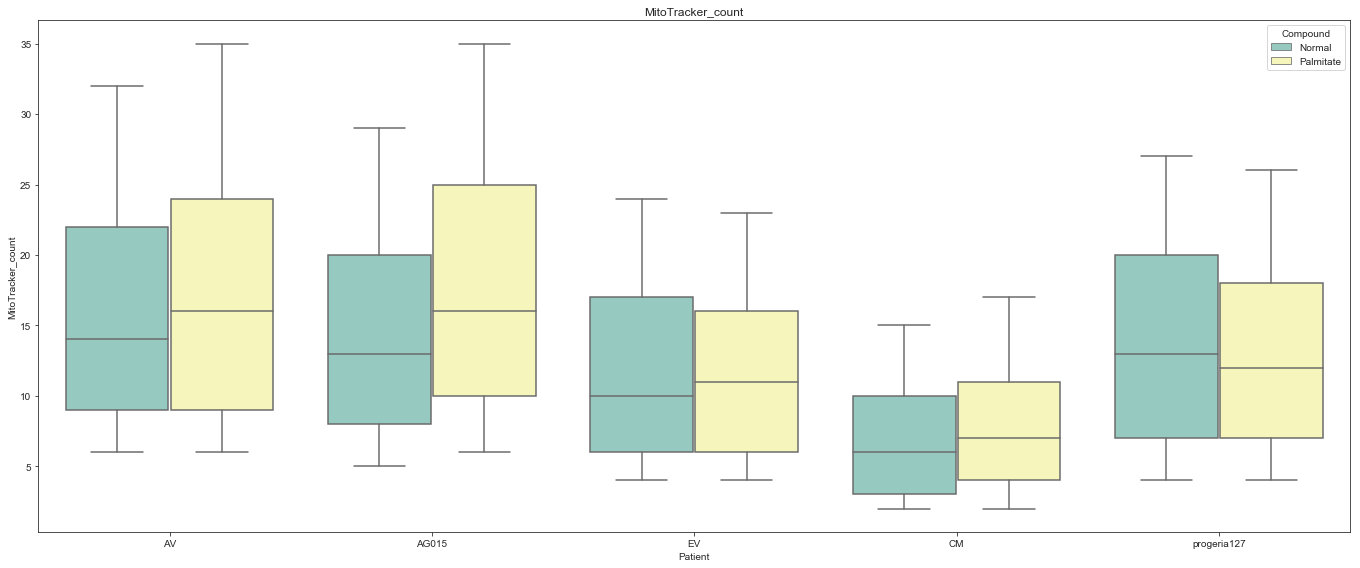

In [34]:
field = 'MitoTracker_count'
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Patient", y=field, hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
ax.set_title(field)
plt.tight_layout()

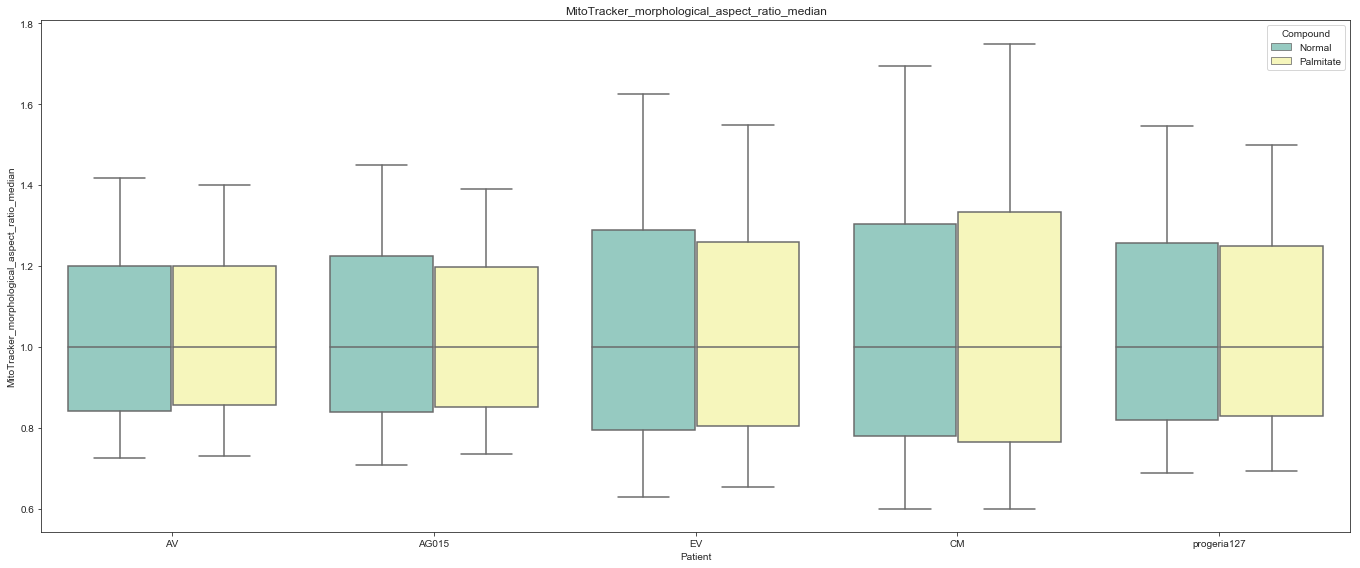

In [38]:
field = 'MitoTracker_morphological_aspect_ratio_median'
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Patient", y=field, hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
ax.set_title(field)
plt.tight_layout()

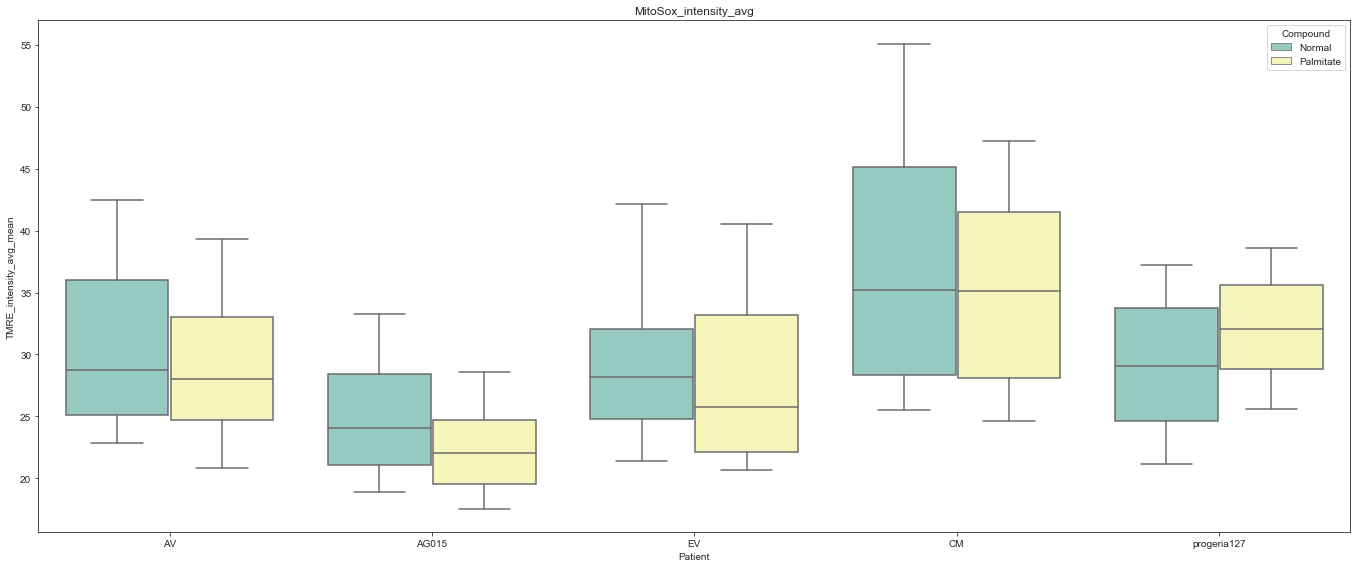

In [29]:
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Patient", y="TMRE_intensity_avg_mean", hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
ax.set_title("TMRE_intensity_avg_mean")
plt.tight_layout()

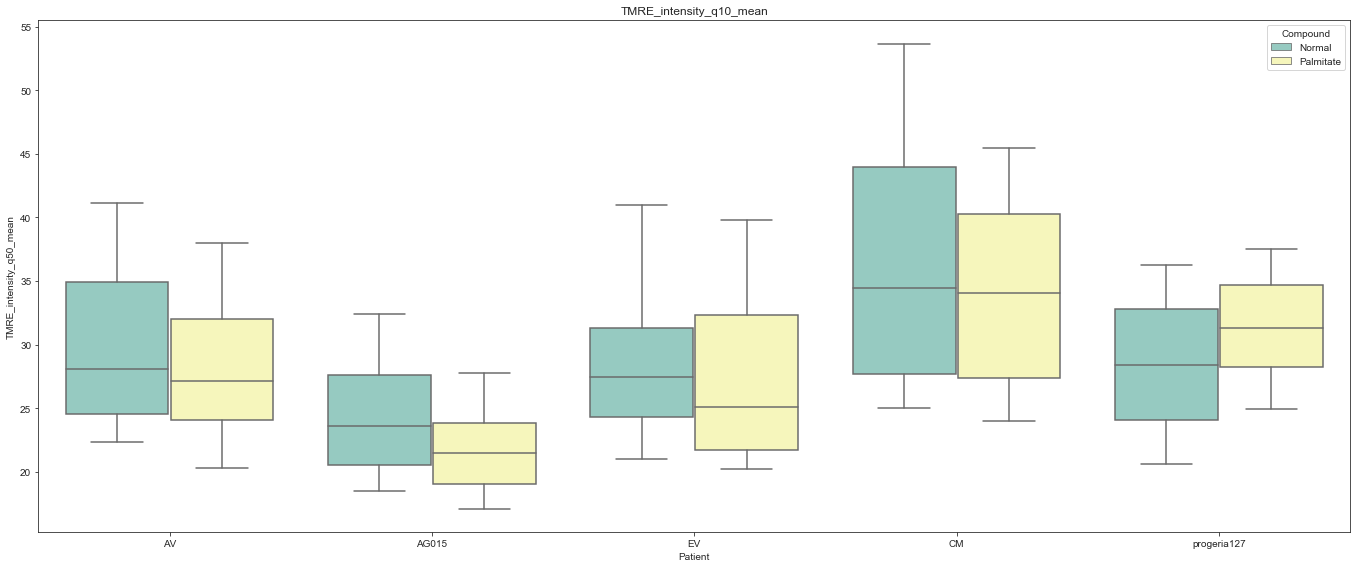

In [43]:
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Patient", y="TMRE_intensity_q50_mean", hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
ax.set_title("TMRE_intensity_q10_mean")
plt.tight_layout()

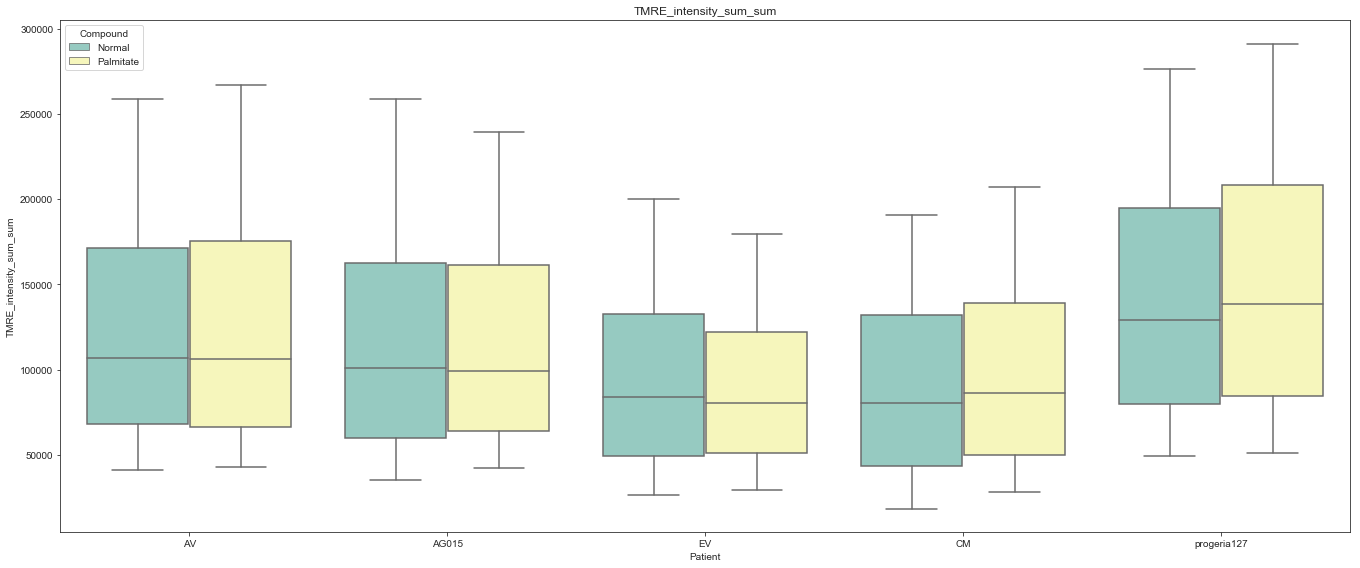

In [31]:
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Patient", y="TMRE_intensity_sum_sum", hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
ax.set_title("TMRE_intensity_sum_sum")
plt.tight_layout()

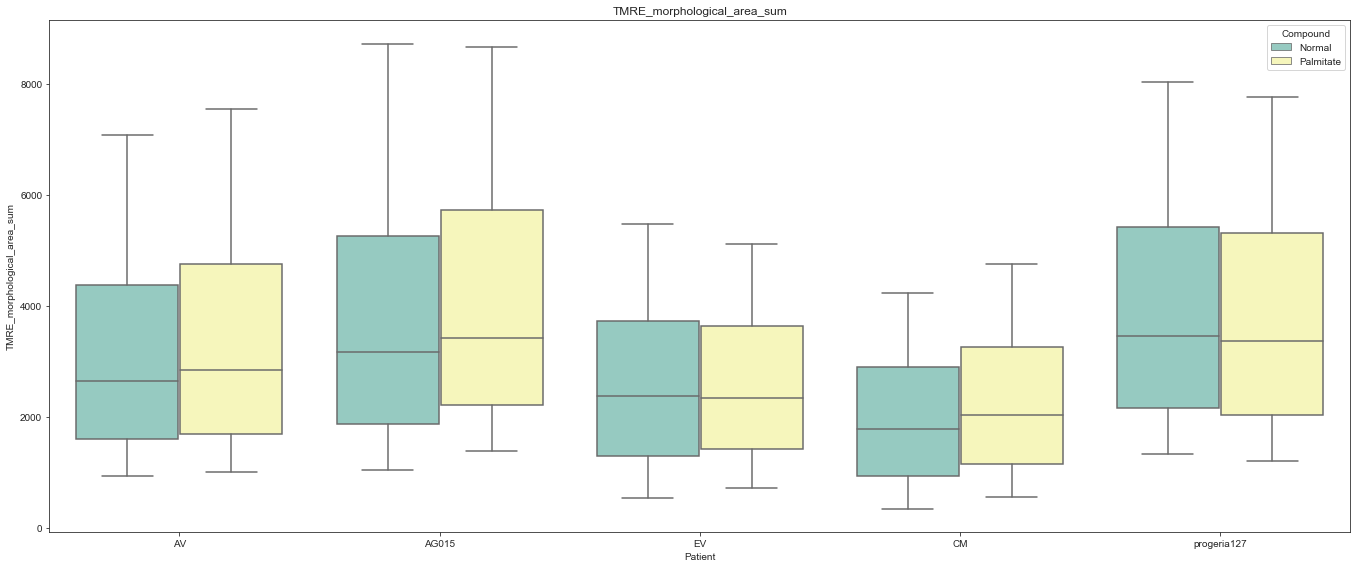

In [40]:

field = 'TMRE_morphological_area_sum'
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Patient", y=field, hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
ax.set_title(field)
plt.tight_layout()

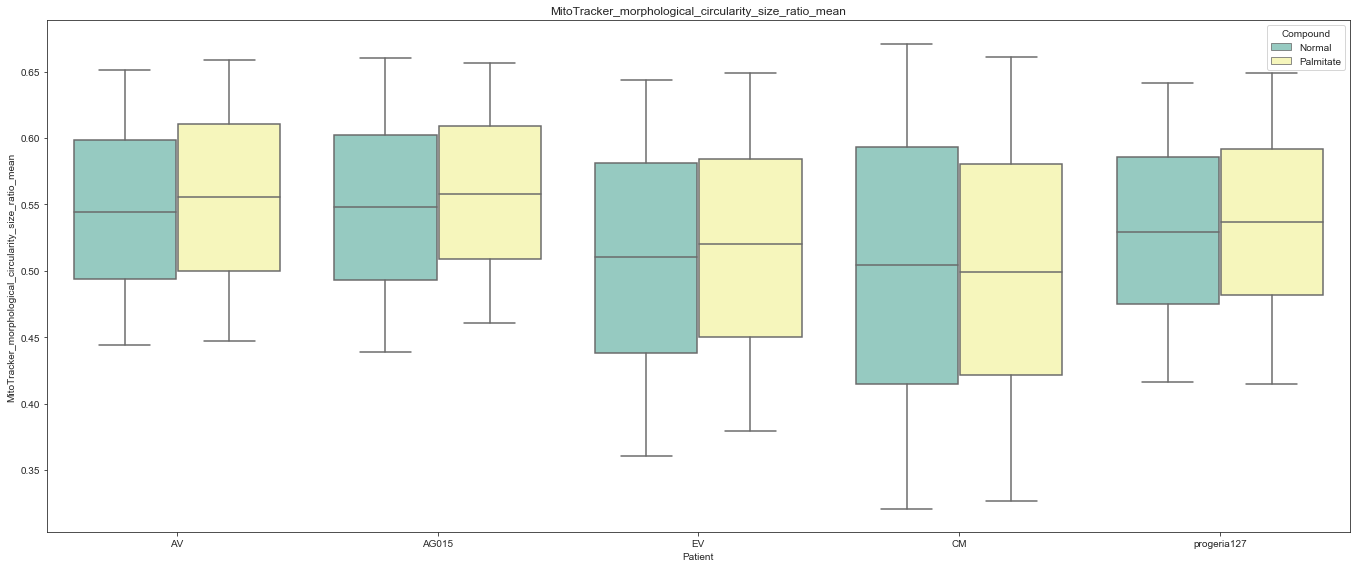

In [44]:
field = 'MitoTracker_morphological_circularity_size_ratio_mean'
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Patient", y=field, hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
ax.set_title(field)
plt.tight_layout()

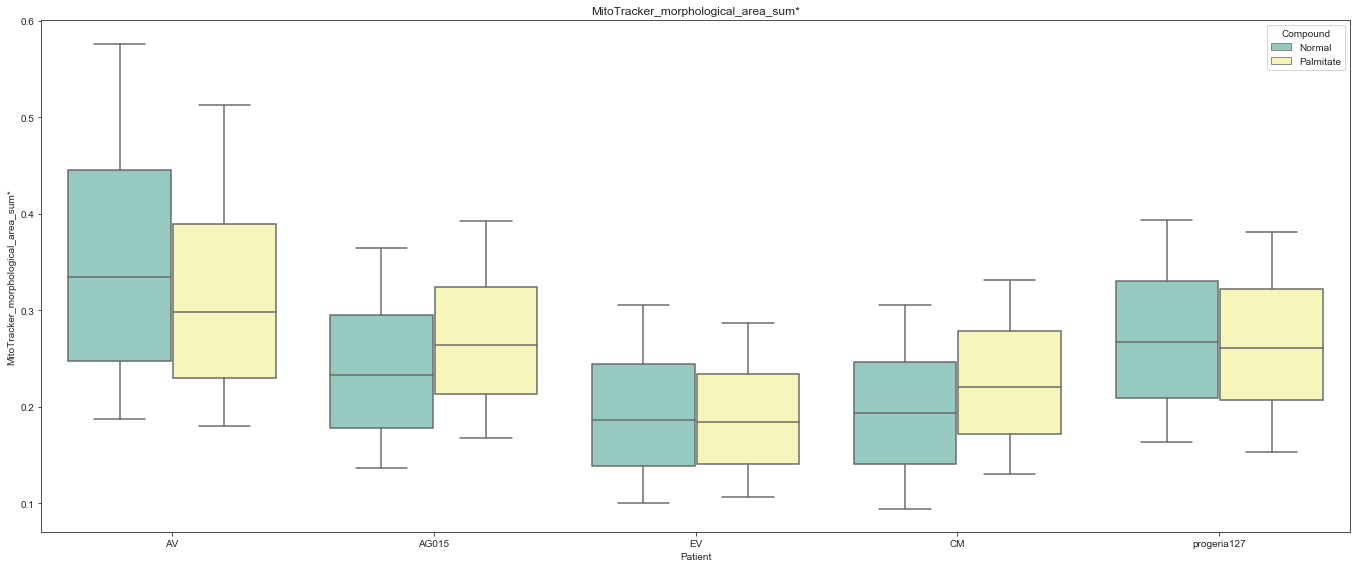

In [24]:
df['MitoTracker_morphological_area_sum*'] = df['MitoTracker_morphological_area_sum']/df['Cyto_morphological_area']
field = 'MitoTracker_morphological_area_sum*'
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Patient", y=field, hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
ax.set_title(field)
plt.tight_layout()

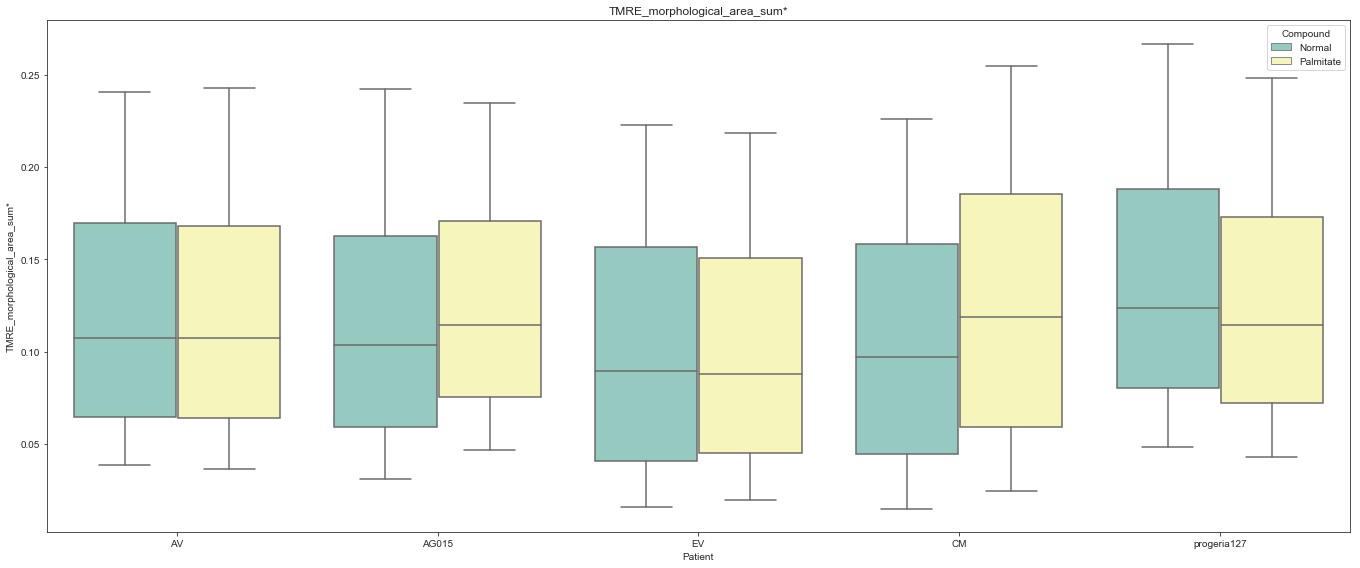

In [47]:
df['TMRE_morphological_area_sum*'] = df['TMRE_morphological_area_sum']/df['Cyto_morphological_area']

field = 'TMRE_morphological_area_sum*'
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Patient", y=field, hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
ax.set_title(field)
plt.tight_layout()

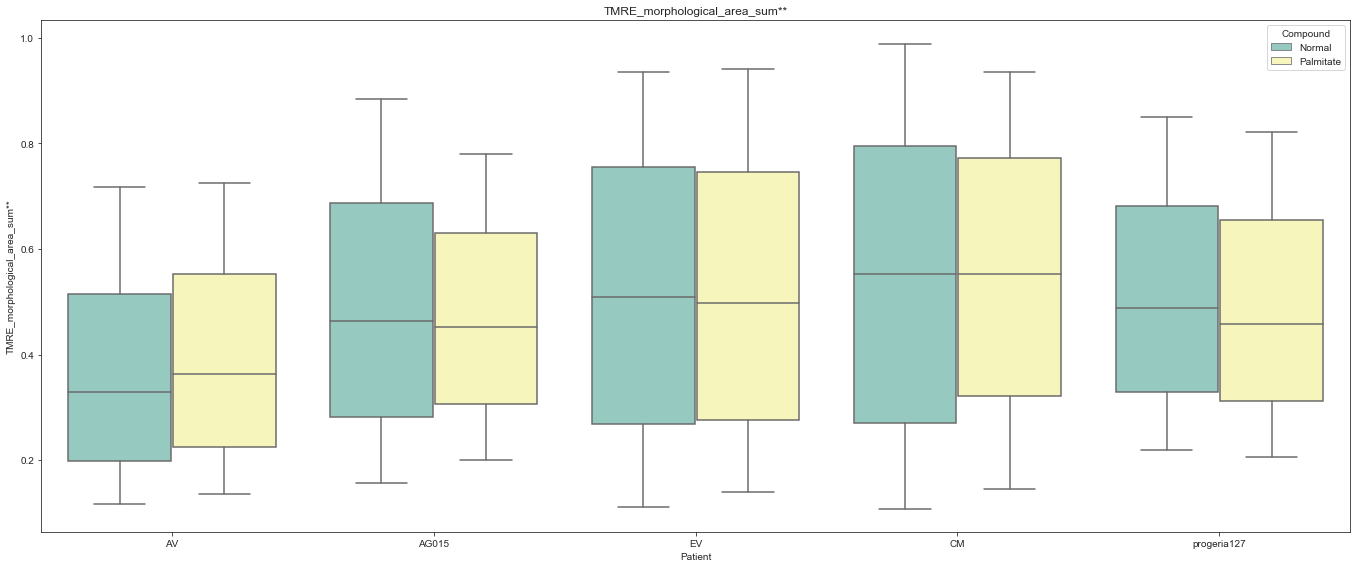

In [49]:
df['TMRE_morphological_area_sum**'] = df['TMRE_morphological_area_sum']/df['MitoTracker_morphological_area_sum']

field = 'TMRE_morphological_area_sum**'
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Patient", y=field, hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
ax.set_title(field)
plt.tight_layout()

In [ ]:
# df.columns.tolist()